🚀 Mengimpor semua library yang dibutuhkan...


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


✅ Semua library berhasil diimpor.
TensorFlow Version: 2.16.1
✅ Semua output akan disimpan di direktori: 'hasil_training_model'

🔄 Memuat dan memproses dataset...


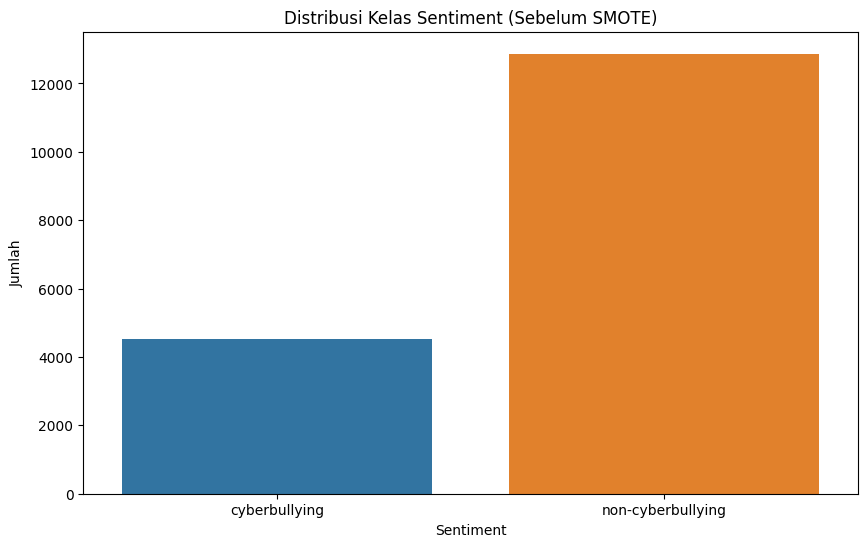

In [1]:
# ==============================================================================
# Step 1: Import Semua Library yang Dibutuhkan
# ==============================================================================
print("🚀 Mengimpor semua library yang dibutuhkan...")

# --- Library untuk Manipulasi Data & Numerik ---
import pandas as pd
import numpy as np
import time
import os

# --- Library untuk Visualisasi ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Library Scikit-learn (sklearn) ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

# --- Library untuk Menangani Data Tidak Seimbang ---
from imblearn.over_sampling import SMOTE

# --- Library Transformers (untuk IndoBERT) ---
from transformers import BertTokenizer

# --- Library TensorFlow & Keras ---
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Concatenate, Dropout, Dense
from tensorflow.keras.utils import plot_model

# --- Install dependensi sistem untuk visualisasi model ---
# Perintah ini mungkin hanya berfungsi di lingkungan seperti Google Colab atau Kaggle
!apt-get install -y graphviz > /dev/null 2>&1
!pip install pydot > /dev/null 2>&1

print("✅ Semua library berhasil diimpor.")
print("TensorFlow Version:", tf.__version__)


# ==============================================================================
# Step 2: Persiapan Direktori Output
# ==============================================================================
# Mendefinisikan direktori untuk menyimpan semua hasil.
OUTPUT_DIR = 'hasil_training_model'
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"✅ Semua output akan disimpan di direktori: '{OUTPUT_DIR}'")


# ==============================================================================
# Step 3: Muat dan Pra-pemrosesan Data
# ==============================================================================
print("\n🔄 Memuat dan memproses dataset...")

# Muat dataset
df = pd.read_csv("/kaggle/input/diverse-dataset-cyberbullying17k/17K_dataset_labeled_clean (1).csv")

# Visualisasi distribusi kelas asli
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label')
plt.title('Distribusi Kelas Sentiment (Sebelum SMOTE)')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')
plt.savefig(os.path.join(OUTPUT_DIR, 'distribusi_kelas_asli.png'))
plt.show()

In [2]:
df.rename(columns={'cleaned_text': 'teks'}, inplace=True)


Distribusi data setelah SMOTE:
label
cyberbullying        12870
non-cyberbullying    12870
Name: count, dtype: int64
✅ Pra-pemrosesan data selesai.

🔪 Melakukan encoding label dan membagi dataset...
Jumlah data training: 20592
Jumlah data validasi: 2574
Jumlah data testing: 2574
✅ Pembagian dataset selesai.

✒️ Melakukan tokenisasi teks untuk input model...


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

✅ Tokenisasi selesai.

🏗️  Membangun arsitektur model Hybrid CNN...
✅ Berhasil, jumlah perangkat terdeteksi: 2


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


✅ Ringkasan model disimpan di 'hasil_training_model/model_summary.txt'
✅ Arsitektur model disimpan sebagai gambar di 'hasil_training_model/model_architecture.png'

💪 Memulai proses training model...
✅ Model terbaik akan disimpan di 'hasil_training_model/best_model.keras'
Epoch 1/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7933 - loss: 0.4948
Epoch 1: val_accuracy improved from -inf to 0.97747, saving model to hasil_training_model/best_model.keras
322/322 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.7936 - loss: 0.4943 - val_accuracy: 0.9775 - val_loss: 0.0710
Epoch 2/100
321/322 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9860 - loss: 0.0530
Epoch 2: val_accuracy improved from 0.97747 to 0.98912, saving model to hasil_training_model/best_model.keras
322/322 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9860 - loss: 0.0529 - val_accuracy: 0.9891 - val_loss: 0.0249
Epoch 3/100
321/322 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9952 - loss: 0.0194
Epoch 3: 

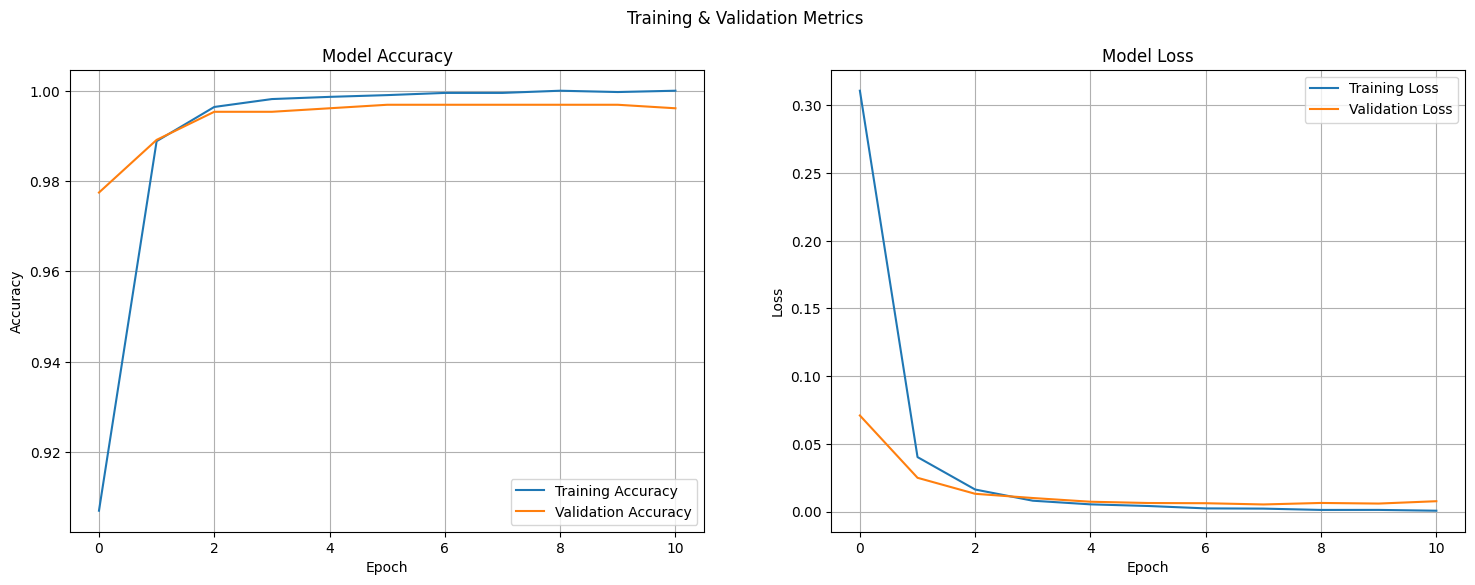

✅ Grafik Akurasi & Loss berhasil disimpan.


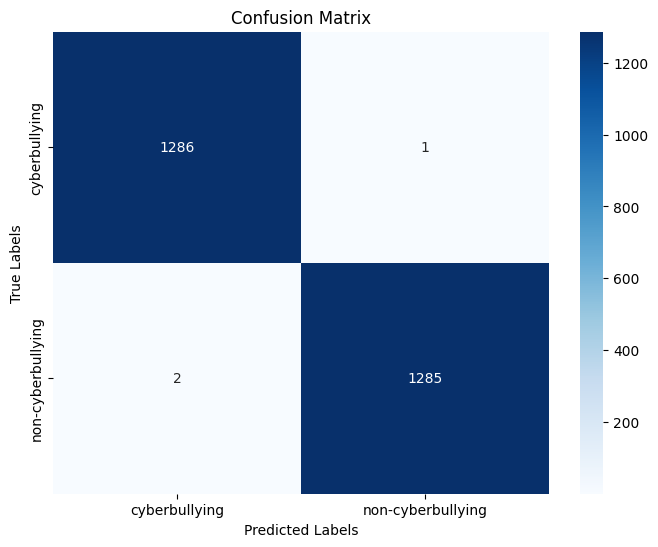

✅ Grafik Confusion Matrix berhasil disimpan.


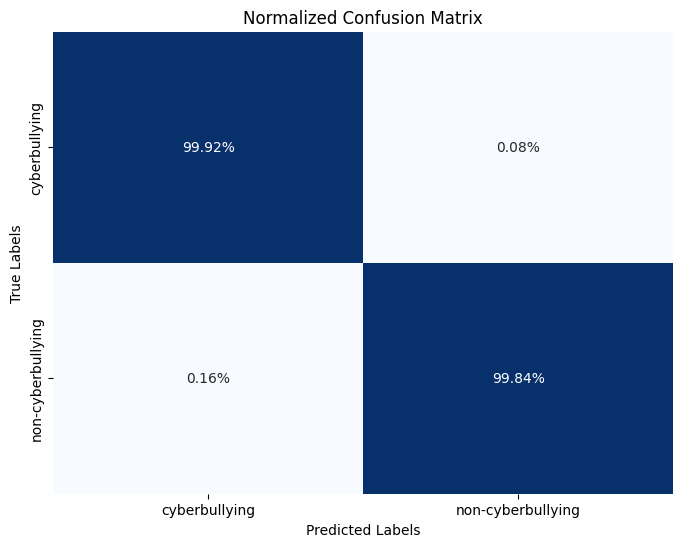

✅ Grafik Normalized Confusion Matrix berhasil disimpan.


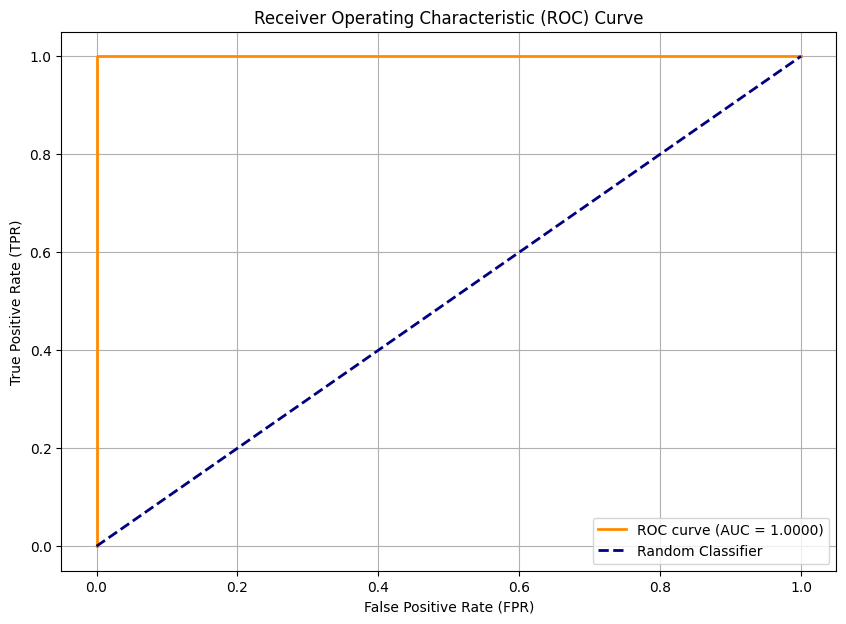

✅ Grafik ROC Curve (AUC = 1.0000) berhasil disimpan.

💾 Menyimpan hasil prediksi ke file CSV untuk analisis...
✅ File CSV prediksi benar disimpan di 'hasil_training_model/prediksi_benar.csv'
✅ File CSV prediksi salah disimpan di 'hasil_training_model/prediksi_salah.csv'


🎉 Semua proses selesai! Model terbaik dan semua output telah disimpan di direktori 'hasil_training_model'.


In [3]:
# Menangani nilai NaN pada kolom teks jika ada
df['teks'] = df['teks'].fillna('')

# Vektorisasi TF-IDF untuk SMOTE
X = df['teks']
y = df['label']
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Terapkan SMOTE untuk menyeimbangkan data
smote = SMOTE(k_neighbors=10, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Konversi kembali vektor hasil resample ke bentuk teks
X_text = [' '.join(tokens) for tokens in tfidf_vectorizer.inverse_transform(X_resampled)]
data_resampled = {'teks': X_text, 'label': y_resampled}
df_resampled = pd.DataFrame(data_resampled)

print("\nDistribusi data setelah SMOTE:")
print(df_resampled['label'].value_counts())
print("✅ Pra-pemrosesan data selesai.")


# ==============================================================================
# Step 4: Encoding Label dan Pembagian Dataset
# ==============================================================================
print("\n🔪 Melakukan encoding label dan membagi dataset...")

# Label Encoding
label_encoder = LabelEncoder()
df_resampled['label'] = label_encoder.fit_transform(df_resampled['label'])

# Pembagian menjadi data train, validation, dan test (80%, 10%, 10%)
# Stratify digunakan untuk memastikan proporsi kelas yang sama di setiap set
df_train, df_test_val = train_test_split(df_resampled, test_size=0.2, random_state=42, stratify=df_resampled['label'])
df_val, df_test = train_test_split(df_test_val, test_size=0.5, random_state=42, stratify=df_test_val['label'])

print(f"Jumlah data training: {len(df_train)}")
print(f"Jumlah data validasi: {len(df_val)}")
print(f"Jumlah data testing: {len(df_test)}")
print("✅ Pembagian dataset selesai.")


# ==============================================================================
# Step 5: Tokenisasi Teks menggunakan IndoBERT
# ==============================================================================
print("\n✒️ Melakukan tokenisasi teks untuk input model...")

# Muat Tokenizer IndoBERT
bert_tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p2')

# Fungsi untuk mengubah teks menjadi token ID
def tokenize_data(data, max_len=256):
    input_ids = []
    attention_masks = []

    for text in data:
        encoded = bert_tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            padding='max_length',
            truncation=True,
            max_length=max_len,
            return_attention_mask=True,
            return_tensors='np'  # Return numpy arrays
        )
        input_ids.append(encoded['input_ids'].flatten())
        attention_masks.append(encoded['attention_mask'].flatten())

    return np.array(input_ids), np.array(attention_masks)

# Lakukan tokenisasi pada semua set data
X_train_ids, X_train_masks = tokenize_data(df_train['teks'])
X_val_ids, X_val_masks = tokenize_data(df_val['teks'])
X_test_ids, X_test_masks = tokenize_data(df_test['teks'])

y_train = np.array(df_train['label'])
y_val = np.array(df_val['label'])
y_test = np.array(df_test['label'])
print("✅ Tokenisasi selesai.")


# ==============================================================================
# Step 6: Bangun Arsitektur Model Hybrid CNN-IndoBERT
# ==============================================================================
print("\n🏗️  Membangun arsitektur model Hybrid CNN...")

# Gunakan MirroredStrategy untuk deteksi multi-GPU
try:
    strategy = tf.distribute.MirroredStrategy()
    print('✅ Berhasil, jumlah perangkat terdeteksi: {}'.format(strategy.num_replicas_in_sync))
except Exception as e:
    print(f"⚠️ Terjadi error saat inisialisasi MirroredStrategy: {e}")
    strategy = tf.distribute.get_strategy() # Fallback ke strategi default

# Semua pembuatan variabel model harus ada di dalam scope ini
with strategy.scope():
    # Definisikan layer Input
    input_ids = Input(shape=(256,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(256,), dtype=tf.int32, name="attention_mask")

    # Layer Embedding
    embedding_layer = tf.keras.layers.Embedding(
        input_dim=bert_tokenizer.vocab_size,
        output_dim=768,
        input_length=256,
        name="Embedding_Layer"
    )(input_ids)

    # Layer CNN Paralel dengan ukuran kernel berbeda
    conv1d_3 = Conv1D(128, kernel_size=3, activation='relu', padding='valid', name="Conv1D_Kernel_3")(embedding_layer)
    pool_3 = GlobalMaxPooling1D(name="MaxPooling_Kernel_3")(conv1d_3)

    conv1d_4 = Conv1D(64, kernel_size=4, activation='relu', padding='valid', name="Conv1D_Kernel_4")(embedding_layer)
    pool_4 = GlobalMaxPooling1D(name="MaxPooling_Kernel_4")(conv1d_4)

    conv1d_5 = Conv1D(32, kernel_size=5, activation='relu', padding='valid', name="Conv1D_Kernel_5")(embedding_layer)
    pool_5 = GlobalMaxPooling1D(name="MaxPooling_Kernel_5")(conv1d_5)

    # Gabungkan (Concatenate) fitur dari semua jalur CNN
    concat_layer = Concatenate(name="Concatenate_Features")([pool_3, pool_4, pool_5])

    # Layer Dropout untuk regularisasi
    dropout_layer = Dropout(0.5, name="Dropout_Layer")(concat_layer)

    # Layer output Dense untuk klasifikasi
    output_layer = Dense(len(label_encoder.classes_), activation='softmax', name="Output_Layer")(dropout_layer)

    # Buat dan kompilasi model
    hybrid_cnn_model = Model(inputs=[input_ids, attention_mask], outputs=output_layer)
    hybrid_cnn_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

# Simpan ringkasan dan arsitektur model
summary_path = os.path.join(OUTPUT_DIR, 'model_summary.txt')
with open(summary_path, 'w') as f:
    hybrid_cnn_model.summary(print_fn=lambda x: f.write(x + '\n'))
print(f"✅ Ringkasan model disimpan di '{summary_path}'")

try:
    plot_path = os.path.join(OUTPUT_DIR, 'model_architecture.png')
    plot_model(hybrid_cnn_model, to_file=plot_path, show_shapes=True, show_layer_names=True, show_layer_activations=True)
    print(f"✅ Arsitektur model disimpan sebagai gambar di '{plot_path}'")
except Exception as e:
    print(f"⚠️ Gagal menyimpan arsitektur model: {e}")


# ==============================================================================
# Step 7: Latih Model
# ==============================================================================
print("\n💪 Memulai proses training model...")

# Sesuaikan Batch Size untuk strategi distribusi
BATCH_SIZE_PER_REPLICA = 32
GLOBAL_BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync

# Buat dataset TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': X_train_ids, 'attention_mask': X_train_masks}, y_train)).shuffle(1000).batch(GLOBAL_BATCH_SIZE)
val_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': X_val_ids, 'attention_mask': X_val_masks}, y_val)).batch(GLOBAL_BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': X_test_ids, 'attention_mask': X_test_masks}, y_test)).batch(GLOBAL_BATCH_SIZE)

# Callback untuk menyimpan model terbaik
model_checkpoint_path = os.path.join(OUTPUT_DIR, 'best_model.keras')
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_checkpoint_path,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

# Callback Early Stopping untuk mencegah overfitting
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
print(f"✅ Model terbaik akan disimpan di '{model_checkpoint_path}'")

# Ukur waktu training
start_time = time.time()
history = hybrid_cnn_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=100,  # Jumlah epoch yang lebih realistis, EarlyStopping akan menghentikannya jika perlu
    callbacks=[model_checkpoint_callback, early_stopping_callback]
)
end_time = time.time()
training_time = end_time - start_time

# Konversi waktu training ke format jam:menit:detik
mins, secs = divmod(training_time, 60)
hours, mins = divmod(mins, 60)
training_time_str = f"{int(hours):02d} jam, {int(mins):02d} menit, {secs:.2f} detik"
print(f"🚀 Waktu Training Selesai: {training_time_str}")


# ==============================================================================
# Step 8: Evaluasi Model dengan Data Tes
# ==============================================================================
print("\n🔍 Mengevaluasi dengan model terbaik yang telah disimpan...")

# Muat model terbaik untuk evaluasi
best_model = tf.keras.models.load_model(model_checkpoint_path)

# Lakukan prediksi
y_pred_probs = best_model.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi pada Data Tes dari model terbaik: {test_accuracy:.4f}")

# Simpan laporan hasil
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
summary_hasil_path = os.path.join(OUTPUT_DIR, 'ringkasan_hasil_training.txt')
with open(summary_hasil_path, 'w') as f:
    f.write("="*45 + "\n")
    f.write("     RINGKASAN HASIL TRAINING & EVALUASI\n")
    f.write("="*45 + "\n\n")
    f.write(f"Waktu Training: {training_time_str}\n\n")
    f.write(f"Akurasi pada Data Tes: {test_accuracy:.4f}\n\n")
    f.write("-"*45 + "\n")
    f.write("           CLASSIFICATION REPORT\n")
    f.write("-"*45 + "\n\n")
    f.write(report)
print(f"✅ Waktu training dan laporan klasifikasi disimpan di '{summary_hasil_path}'")


# ==============================================================================
# Step 9: Buat dan Simpan Semua Grafik Visualisasi
# ==============================================================================
print("\n📊 Membuat dan menyimpan semua grafik visualisasi...")

# --- Plot Akurasi dan Loss ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
# Plot Akurasi
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy'); ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy'); ax1.legend(); ax1.grid(True)
# Plot Loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss'); ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss'); ax2.legend(); ax2.grid(True)
plt.suptitle('Training & Validation Metrics')
plt.savefig(os.path.join(OUTPUT_DIR, 'plot_metrics.png')); plt.show(); plt.close()
print("✅ Grafik Akurasi & Loss berhasil disimpan.")

# --- Confusion Matrix ---
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=True,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels"); plt.ylabel("True Labels"); plt.title("Confusion Matrix")
plt.savefig(os.path.join(OUTPUT_DIR, 'confusion_matrix.png')); plt.show(); plt.close()
print("✅ Grafik Confusion Matrix berhasil disimpan.")

# --- Normalized Confusion Matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix / np.sum(cf_matrix, axis=1, keepdims=True), annot=True,
            fmt='.2%', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels"); plt.ylabel("True Labels"); plt.title("Normalized Confusion Matrix")
plt.savefig(os.path.join(OUTPUT_DIR, 'confusion_matrix_normalized.png')); plt.show(); plt.close()
print("✅ Grafik Normalized Confusion Matrix berhasil disimpan.")

# --- ROC Curve ---
y_pred_proba = y_pred_probs[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)'); plt.ylabel('True Positive Rate (TPR)'); plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right"); plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, 'roc_auc_curve.png')); plt.show(); plt.close()
print(f"✅ Grafik ROC Curve (AUC = {auc_score:.4f}) berhasil disimpan.")


# ==============================================================================
# Step 10: Simpan Hasil Prediksi ke File CSV
# ==============================================================================
print("\n💾 Menyimpan hasil prediksi ke file CSV untuk analisis...")
hasil_df = pd.DataFrame({
    'Teks_Asli': df_test['teks'].reset_index(drop=True),
    'Label_Asli': label_encoder.inverse_transform(y_test),
    'Label_Prediksi': label_encoder.inverse_transform(y_pred),
    'Probabilitas_Kelas_0': y_pred_probs[:, 0],
    'Probabilitas_Kelas_1': y_pred_probs[:, 1]
})

prediksi_benar = hasil_df[hasil_df['Label_Asli'] == hasil_df['Label_Prediksi']]
prediksi_salah = hasil_df[hasil_df['Label_Asli'] != hasil_df['Label_Prediksi']]

path_benar = os.path.join(OUTPUT_DIR, 'prediksi_benar.csv')
path_salah = os.path.join(OUTPUT_DIR, 'prediksi_salah.csv')

prediksi_benar.to_csv(path_benar, index=False, encoding='utf-8-sig')
prediksi_salah.to_csv(path_salah, index=False, encoding='utf-8-sig')

print(f"✅ File CSV prediksi benar disimpan di '{path_benar}'")
print(f"✅ File CSV prediksi salah disimpan di '{path_salah}'")

print("\n\n🎉 Semua proses selesai! Model terbaik dan semua output telah disimpan di direktori 'hasil_training_model'.")